In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mushrooms.csv')

### Data preprocessing

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<AxesSubplot:xlabel='class', ylabel='count'>

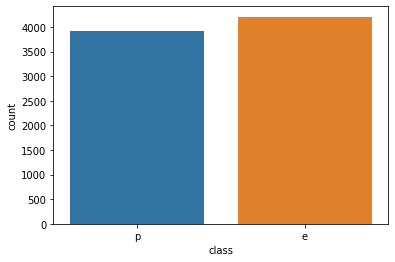

In [4]:
sns.countplot(data=df,x='class')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### Sorting based on number of unique values per feature

In [6]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

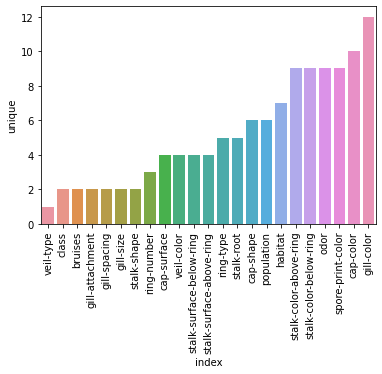

In [7]:
sns.barplot(data=feat_uni,x='index',y='unique')
plt.xticks(rotation =90);

In [8]:
X = df.drop('class',axis=1)

#### Checking if there are any null values

In [9]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
lst = list(X.columns)
lst

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

#### Encoding the categorical features
* drop first=True in order to avoid the dummy variable trap


In [11]:
X = pd.get_dummies(X,drop_first=True)

In [12]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [13]:
y =df['class']

### Importing the model and performing train-test split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=101)

In [16]:
from sklearn.ensemble import AdaBoostClassifier

* base_estimator parameter is used to choose the model from which the boosted ensemble will be built

* By default the estimator is a decision tree with a depth 1

In [17]:
model = AdaBoostClassifier(n_estimators=1)

In [18]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

### Obtaining performance metrics

In [19]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [20]:
predictions = model.predict(X_test)

In [21]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [23]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
model.feature_importances_.argmax()

22

In [25]:
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

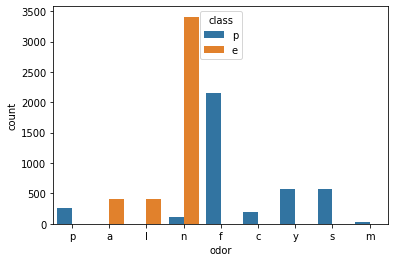

In [26]:
sns.countplot(data=df,x='odor',hue='class')

In [27]:
len(X.columns)

95

### Determining the ideal number of estimators by plotting the error rates

Previously, we chose number of estimators as 1 by default. Here we try to visualise the number of estimators vs prediction error to arrive at the optimal value

In [28]:
error_rates = []
for n in range(1,len(X.columns)+1):
    model = AdaBoostClassifier(n_estimators = n)
    model.fit(X_train,y_train)

    preds = model.predict(X_test)

    err = 1 - accuracy_score(y_test,preds)

    error_rates.append(err)

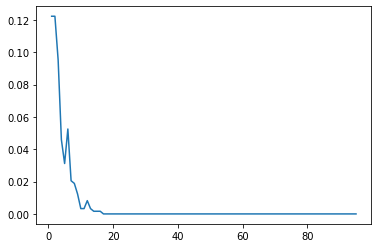

In [29]:
plt.plot(range(1,96),error_rates)

In [30]:
features = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

Filtering out features with non zero importance values

In [31]:
importances = features[features['Importance']>0]

In [32]:
importances

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


### Plotting the feature importances assigned by the model

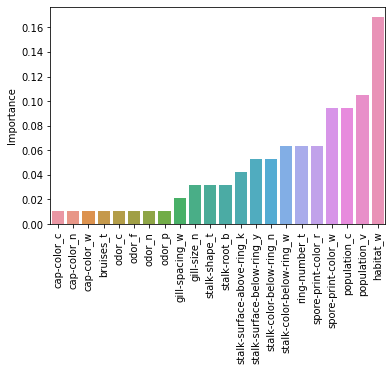

In [34]:
sns.barplot(data=importances.sort_values('Importance'),x=importances.index,y='Importance')
plt.xticks(rotation=90);

### Grid search to determine the best value for number of estimators

Alternatively, instead of looping through the errors which can be pretty cumbersome, we use GridSearch functionality to obtain the optimal value

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
adaboost = AdaBoostClassifier()

n_estimators = list(range(1,len(X.columns)+1))

param_grid = {'n_estimators':n_estimators}

grid_adaboost = GridSearchCV(estimator=adaboost,param_grid=param_grid,scoring=accuracy_score)

In [38]:
grid_adaboost.fit(X_train,y_train)